In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('cardio_train.csv', sep = ';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df = df.drop(['id'], axis = 1)

In [4]:
df.shape

(70000, 12)

In [5]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [6]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='gender', ylabel='count'>

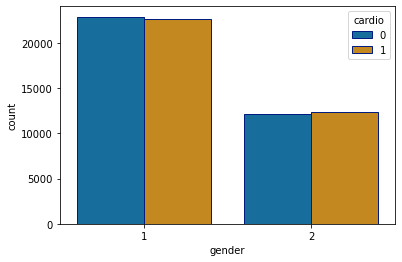

In [8]:
sns.countplot(x = 'gender', hue = 'cardio', data = df, palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors = 1))

In [9]:
df['age_year'] = (df['age']/365).round()
df['age_year']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age_year, Length: 70000, dtype: float64

<AxesSubplot:xlabel='age_year', ylabel='count'>

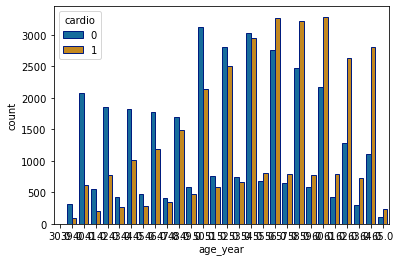

In [10]:
sns.countplot(x = 'age_year', hue = 'cardio', data = df, palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors = 1))

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [12]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,-0.029918


In [13]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,53.0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,62.0
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.0


In [14]:
df = df.drop(['age_year'], axis = 1)

In [15]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [16]:
X = df.iloc[:, :-1]
Y = df.iloc[:, 11]
Y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

# **Train Test Split**

In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# **Random Forrest Classifier Model**

In [18]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

In [19]:
RFC.fit(xtrain, ytrain)

RandomForestClassifier()

In [20]:
RFC.score(xtest, ytest)

0.7145238095238096

# **Decision Tree Classifier Model**

In [21]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

In [22]:
DTC.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [23]:
DTC.score(xtest, ytest)

0.6355714285714286

# **Naive Bayes Classifier Model**
## **Gausian Naive Bayes**

In [24]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

GNB.fit(xtrain, ytrain)

GaussianNB()

In [25]:
GNB.score(xtest, ytest)

0.5948571428571429

## **Bernouli Naive Bayes**

In [26]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()

BNB.fit(xtrain, ytrain)

BernoulliNB()

In [27]:
BNB.score(xtest, ytest)

0.5145714285714286

## **Multinomial Naive Bayes**

In [28]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()

MNB.fit(xtrain, ytrain)

ValueError: Negative values in data passed to MultinomialNB (input X)